In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import json
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./diamonds.csv")

In [3]:
data

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    330  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    327  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    328  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    337  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    338  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2758  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2759  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2760  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2761  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

In [4]:
profile = ProfileReport(data, title="Diamond",correlations={'pearson': {'calculate': True}},explorative=True)
correlations = profile.description_set["correlations"]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/ydata_profiling/model/pandas/correlations_pandas.py:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df.corr(method="pearson")
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


In [5]:
pearson_df=correlations['pearson']

In [6]:
pearson_df.values

array([[ 1.        , -0.37798348, -0.03480023, -0.10083032, -0.30687349,
        -0.40544047, -0.39584267, -0.39920829],
       [-0.37798348,  1.        ,  0.02822431,  0.18161755,  0.92159143,
         0.97509423,  0.9517222 ,  0.95338738],
       [-0.03480023,  0.02822431,  1.        , -0.29577852, -0.01064773,
        -0.02528925, -0.02934067,  0.09492388],
       [-0.10083032,  0.18161755, -0.29577852,  1.        ,  0.12713358,
         0.19534428,  0.18376015,  0.15092869],
       [-0.30687349,  0.92159143, -0.01064773,  0.12713358,  1.        ,
         0.88443578,  0.86542169,  0.86125027],
       [-0.40544047,  0.97509423, -0.02528925,  0.19534428,  0.88443578,
         1.        ,  0.97470148,  0.9707718 ],
       [-0.39584267,  0.9517222 , -0.02934067,  0.18376015,  0.86542169,
         0.97470148,  1.        ,  0.95200572],
       [-0.39920829,  0.95338738,  0.09492388,  0.15092869,  0.86125027,
         0.9707718 ,  0.95200572,  1.        ]])

In [8]:
profile.to_notebook_iframe()


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#Q1.1
# carat has the highest absolute correlation with price
# correlation pattern suggests that the dimension of diamond and the carat of a diamond have a close positive relation
# on the price of the diamond

In [ ]:
import seaborn as sns

In [ ]:
#Q1.1
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(pearson_df, 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='BrBG')
heatmap.set_title('Pearson Correlation Heatmap', 
                  fontdict={'fontsize':18}, 
                  pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

0.92 is the highest absolute correlation with "price". It's between price and carat. 

Based on the correlation matrix plot, we can see there's high correlatin carate and x,y,z. So, when we choose feature we should avoid carat and x,y,z at the same time to avoid multicollinearity. 

In [ ]:
#Q1.2
num = ["carat", "depth","table","price","x","y","z"]
num_data = data[num]
for i, col in enumerate(num_data.columns):
    plt.figure(i)
    sns.distplot(num_data[col])

For high skewed data, we can do transformation like log transform, square-root transform, and box-cox tranform. We also can replace extreme values, trimming data, and standarlization the data. 

In [ ]:
#Q1.3
index = ["cut", "color","clarity","price"]
category = ["cut", "color","clarity"]
cate_data = data[index]

for i, col in enumerate(category):
    plt.figure(i)
    sns.boxplot(data=cate_data, x=cate_data[col], y='price')

In [ ]:
#Q1.4
for i, col in enumerate(category):
    plt.figure(i)
    cate_data[col].value_counts()[cate_data[col].unique()].plot(kind='bar')

In [4]:
cut_map={'Fair':1, 'Good':2,'Very Good':3, 'Premium':4, 'Ideal':5}
color_map={'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}
clarity_map={'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}
processed_cut=[]
processed_color=[]
processed_clarity=[]
for cut in data['cut']:
    processed_cut.append(cut_map[cut])
for color in data['color']:
    processed_color.append(color_map[color])
for clarity in data['clarity']:
    processed_clarity.append(clarity_map[clarity])
df_cut=pd.DataFrame(processed_cut,columns=['cut'])
df_color=pd.DataFrame(processed_color,columns=['color'])
df_clarity=pd.DataFrame(processed_clarity,columns=['clarity'])

In [5]:

processed_data=pd.concat([data[['carat', 'depth', 'table', 'x', 'y', 'z']],df_cut,df_color,df_clarity], axis=1)

In [126]:
processed_data

carat  depth  table     x     y     z  cut  color  clarity
0       0.23   61.5   55.0  3.95  3.98  2.43    5      6        2
1       0.21   59.8   61.0  3.89  3.84  2.31    4      6        3
2       0.23   56.9   65.0  4.05  4.07  2.31    2      6        5
3       0.29   62.4   58.0  4.20  4.23  2.63    4      2        4
4       0.31   63.3   58.0  4.34  4.35  2.75    2      1        2
...      ...    ...    ...   ...   ...   ...  ...    ...      ...
53935   0.72   60.8   57.0  5.75  5.76  3.50    5      7        3
53936   0.72   63.1   55.0  5.69  5.75  3.61    2      7        3
53937   0.70   62.8   60.0  5.66  5.68  3.56    3      7        3
53938   0.86   61.0   58.0  6.15  6.12  3.74    4      3        2
53939   0.75   62.2   55.0  5.83  5.87  3.64    5      7        2

[53940 rows x 9 columns]

In [6]:
#Q2.1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data=scaler.fit_transform(processed_data)

In [79]:
#Q2.2
# This step helps us select features that are relevant so that noise and irrelevant features that are used to training
# can be reduced. By reducing irrelevant features and focusing more on relevant features, the impact of irrelevant
# data can be reduced and thus model has better performance. This is not true for every model, for model that is simple 
# and contain lots of data may not be largely impacted by irrelevant data.


In [64]:
processed_data.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity'], dtype='object')

In [77]:
from sklearn.feature_selection import f_regression, mutual_info_regression
for var in processed_data.columns:
    print('{} and price have a mutual information of {}'.format(var,mutual_info_regression(processed_data[[var]],data[['price']])))

/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


carat and price have a mutual information of [1.65298625]


/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth and price have a mutual information of [0.03094183]


/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


table and price have a mutual information of [0.03346169]


/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


x and price have a mutual information of [1.41125725]


/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


y and price have a mutual information of [1.42150495]


/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


z and price have a mutual information of [1.36072582]


/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cut and price have a mutual information of [0.05640429]


/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


color and price have a mutual information of [0.10487574]


/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


clarity and price have a mutual information of [0.15360796]


In [78]:
#depth and table have lowest MI with respect to target.


In [64]:
#Q3
#OOB Error is the average prediction error rate across all tree in the random forest, which is 1-self.oob_score_ given the link
# R2 score measures how the changes of target variable is represented by the model, which is just self.oob_score_ given the link.


In [111]:
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from sklearn.model_selection import GridSearchCV
cachedir = mkdtemp()
pipe = Pipeline(steps=[ 
                       ("scaler", scaler),
                       ("model", MLPRegressor(random_state=42, max_iter=500))], memory=cachedir)
    
param_grid = {
    "model__hidden_layer_sizes":[(100,9),(9,5,2),(100,),(100,1)],
    "model__alpha":[10,1,1e-3,1e-4,1e-5]
    
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10,scoring='neg_root_mean_squared_error') 

search.fit(processed_data, data['price'])

/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converge

/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converge

/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converge

/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converge

/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converge

/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converge

GridSearchCV(cv=10,
             estimator=Pipeline(memory='/var/folders/n8/dyc9pqhx0y1bnvqnm7ntqxtw0000gn/T/tmpm4mnfpem',
                                steps=[('scaler', StandardScaler()),
                                       ('model',
                                        MLPRegressor(max_iter=500,
                                                     random_state=42))]),
             n_jobs=-1,
             param_grid={'model__alpha': [10, 1, 0.001, 0.0001, 1e-05],
                         'model__hidden_layer_sizes': [(100, 9), (9, 5, 2),
                                                       (100,), (100, 1)]},
             scoring='neg_root_mean_squared_error')

In [112]:
search.cv_results_

{'mean_fit_time': array([69.53815956, 44.64603155, 51.4068604 , 58.61536214, 68.85537333,
        43.84162834, 52.12813275, 61.40282075, 70.58901389, 44.81236656,
        52.29820249, 59.51010857, 69.58250079, 43.79703016, 51.6030313 ,
        60.93740592, 71.69712803, 41.80589902, 52.60270166, 52.69297869]),
 'std_fit_time': array([ 1.4822933 ,  3.55665284,  1.29671556,  1.61780793,  5.93501317,
         0.5712117 ,  2.8697754 , 11.15955784, 11.92905384,  5.83504037,
         7.43375971,  9.29221822, 11.38644031,  6.02844597,  7.98605812,
        11.95931418, 15.18694677,  6.32548366, 11.16171549,  4.81524503]),
 'mean_score_time': array([0.0080811 , 0.00298309, 0.00416083, 0.00439954, 0.00675755,
        0.0020833 , 0.00397081, 0.00835791, 0.00530722, 0.00120542,
        0.00437291, 0.00440621, 0.00488968, 0.00142806, 0.00489504,
        0.00580597, 0.00961049, 0.0015732 , 0.00413024, 0.00320337]),
 'std_score_time': array([0.00454982, 0.00281486, 0.00120404, 0.00281099, 0.00154268,


In [114]:
search.best_params_

{'model__alpha': 1, 'model__hidden_layer_sizes': (100, 1)}

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPRegressor
import numpy as np
act_choice=['identity', 'logistic', 'tanh', 'relu']
for act in act_choice:
    model=MLPRegressor(random_state=42, max_iter=500,activation=act,alpha=1, hidden_layer_sizes=(100,1))
    scores = cross_validate(model,scaled_data, data['price'], cv=10, scoring='neg_root_mean_squared_error')
    print('{} has a cross RMSE of {}'.format(act,-np.mean(scores['test_score'])))

identity has a cross RMSE of 1213.83477711746


/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converge

logistic has a cross RMSE of 4247.203945487334


/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converge

tanh has a cross RMSE of 4246.038075210081


/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converge

relu has a cross RMSE of 632.0159703112121


/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [61]:
#Q6.3
#I used RELU as activation function because it has the best performance under the best parameter set. Besides RELU is 
#a good activation function for gradient that can be small, which can be caused by deep neural network.

In [116]:
#Q6.4
# if we increase the depth of network too far, the model can be overfitting and make the performance worse. Besides, 
# it is possible that as depth increases, gradient becomes too small and hard to compute.

In [128]:
#Q7
#Q7.1
#Maximum number of features indicate the maximum number of features to be considered when splitting into forest. A smaller
#less number of features can facilitate the randomness of the forest and may give better performance. But it is possible that
#a too low number of features may neglect important features and give bad performance
#number of trees: More number of trees allow taking more trees into consideration to give predictions. But too many trees
#may cause overfitting.
#depth of tree: The deeper a tree can be the better the model can fit the data. 
#But because of that, a deeper tree can cause overfitting and affect the performance of model
#Maximum number of features will have regularization effect. Setting a small maximum number of features will take less 
#number of features into consideration and avoid overfitting
#number of tree will have regularization effect. By having more number of trees, the effect of overfitting that may happen
#in one tree will be reduced and avoid the impact of overfitting.
#depth of tree will have a regularization effect as well. Setting a smaller depth of tree will avoid overfitting data
from sklearn.ensemble import RandomForestRegressor
max_feat_choice=range(2,5)
num_tree_choice=range(50,55)
depth_choice=range(5,10)

from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from sklearn.model_selection import GridSearchCV
cachedir = mkdtemp()
pipe = Pipeline(steps=[ 
                       ("scaler", scaler),
                       ("model", RandomForestRegressor(random_state=42,oob_score=True))], memory=cachedir)
    
param_grid = {
    "model__max_depth":depth_choice,
    "model__n_estimators":num_tree_choice,
    "model__max_features":max_feat_choice
    
}

search1 = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10,scoring='neg_root_mean_squared_error') 

search1.fit(processed_data, data['price'])

GridSearchCV(cv=10,
             estimator=Pipeline(memory='/var/folders/n8/dyc9pqhx0y1bnvqnm7ntqxtw0000gn/T/tmpazym462u',
                                steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(oob_score=True,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': range(5, 10),
                         'model__max_features': range(2, 5),
                         'model__n_estimators': range(50, 55)},
             scoring='neg_root_mean_squared_error')

In [14]:
search1.cv_results_

{'mean_fit_time': array([0.83794005, 0.75781379, 0.76560676, 0.77908838, 0.80107713,
        0.95568748, 0.97141287, 0.99673395, 1.01788535, 1.03062544,
        1.17243934, 1.1993623 , 1.25047576, 1.23462589, 1.26380141,
        0.85171235, 0.84487832, 0.86510108, 0.88103297, 0.8982909 ,
        1.20423856, 1.17203383, 1.15734086, 1.22618983, 1.24925225,
        1.40810707, 1.43575718, 1.56779687, 1.54049163, 1.57355614,
        0.95536432, 0.97756248, 1.11601286, 1.2501451 , 1.02158134,
        1.24288261, 1.27338655, 1.29351957, 1.31624472, 1.40499847,
        1.57945004, 1.70310082, 1.70271707, 1.7942138 , 1.72635753,
        1.05064507, 1.09027157, 1.14083843, 1.18255286, 1.15907695,
        1.38653405, 1.53092868, 1.93511395, 1.53530564, 1.52242794,
        1.72757869, 1.7291714 , 1.77071152, 1.8476366 , 1.86189229,
        1.15475399, 1.29348326, 1.27365279, 1.2968847 , 1.32515466,
        1.56629839, 1.54341774, 1.57003846, 1.59801972, 1.75015697,
        1.88950298, 1.90611742,

In [18]:
search1.best_estimator_

Pipeline(memory='/var/folders/n8/dyc9pqhx0y1bnvqnm7ntqxtw0000gn/T/tmpq3wica75',
         steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=9, max_features=4,
                                       n_estimators=50, oob_score=True,
                                       random_state=42))])

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
best_rand_forest=RandomForestRegressor(max_depth=9, max_features=4,
                                       n_estimators=50, oob_score=True,
                                       random_state=42)
cv_res=cross_validate(best_rand_forest,scaled_data,data['price'],scoring='neg_mean_squared_error',cv=10,return_estimator=True)

In [9]:
cv_res['estimator'][0].estimators_[0]

DecisionTreeRegressor(max_depth=9, max_features=4, random_state=1608637542)

In [ ]:
#Q7.2
#When a threshold is applied on a feature at each layer, a linear boundary is formed to split into groups on each tree.
#But each tree will apply such a threshold on a feature and form boundary to make prediction. Predictions from multiple
#trees combined will form highly non-linear boundary

In [11]:
#Q7.3
from sklearn import tree
import graphviz 
dot_data=tree.export_graphviz(cv_res['estimator'][0].estimators_[0],max_depth=4,filled=True)
graph = graphviz.Source(dot_data)
graph.render('tree.png', view=True)

'tree.png.pdf'

In [49]:
cv_res['estimator'][0].estimators_[0].feature_importances_

array([6.70763190e-01, 1.72170718e-03, 5.50284324e-04, 5.09647187e-02,
       1.88479265e-01, 8.65323440e-03, 1.22940038e-03, 2.21432981e-02,
       5.54949027e-02])

In [51]:
#  Which feature is selected for branching at the root node?
# As the plot shown, X[0]is selected for branching at the root node which is carat
# What can you infer about the importance of this feature as opposed to others?
# The feature selected for branching at root is more important than other features, though it is possible that the feature
# selected for branching at root is not the most important one.
# Do the important features correspond to what you got in part 3.3.1?
# as the feature_importances_ shown, the most important ones are X[0],X[4],X[8],X[3], which corresponds to carat, y, clarity, x
# This is not exactly what I got in 3.3.1 but it covers most of the important features like carat, y, x.

In [60]:
#Q7.4
oob=1-cv_res['estimator'][0].oob_score_
print(oob)
#OOB error indicates how the model perform in unseen data by measuring prediction error rate on unseen data
#R2 score indicates how model fit the data provided

0.02304389892974079


In [12]:
#Q9
from collections import defaultdict
fs=defaultdict(list)
tweets_tags=['#gohawks','#gopatriots','#nfl','#patriots','#sb49','#superbowl']
for tag in tweets_tags:
    with open("./ECE219_tweet_data/tweets_{}.txt".format(tag)) as file:
        for line in file:
            fs[tag].append(line)

In [6]:
def compute_stats(tag):
    times=[]
    tot_retweets=0
    tot_followers=0
    for line in fs[tag]:
        json_obj=json.loads(line)
        times.append(json_obj['citation_date'])
        tot_retweets+=json_obj['metrics']['citations']['total']
        tot_followers+=json_obj['author']['followers']
    avg_twt_perhour=(max(times)-min(times))/len(fs[tag])/3600
    avg_follower=tot_followers/len(fs[tag])
    avg_retwts=tot_retweets/len(fs[tag])
    tags_stats[tag]['avg_twt_perhour']=avg_twt_perhour
    tags_stats[tag]['avg_follower']=avg_twt_perhour
    tags_stats[tag]['avg_retwts']=avg_retwts

In [3]:
import json
tag_json=defaultdict(list)
tags_stats={'#gohawks':{'avg_twt_perhour':0,'avg_follower':0,'avg_retwts':0},
            '#gopatriots':{'avg_twt_perhour':0,'avg_follower':0,'avg_retwts':0},
            '#nfl':{'avg_twt_perhour':0,'avg_follower':0,'avg_retwts':0},
            '#patriots':{'avg_twt_perhour':0,'avg_follower':0,'avg_retwts':0},
            '#sb49':{'avg_twt_perhour':0,'avg_follower':0,'avg_retwts':0},
            '#superbowl':{'avg_twt_perhour':0,'avg_follower':0,'avg_retwts':0}}
for tag in tweets_tags:
    compute_stats(tag)
            

In [6]:
tags_stats

{'#gohawks': {'avg_twt_perhour': 0.0034189454292693376,
  'avg_follower': 0.0034189454292693376,
  'avg_retwts': 2.0132093991319877},
 '#gopatriots': {'avg_twt_perhour': 0.02441722314377667,
  'avg_follower': 0.02441722314377667,
  'avg_retwts': 1.4081919101697078},
 '#nfl': {'avg_twt_perhour': 0.0025187559782147415,
  'avg_follower': 0.0025187559782147415,
  'avg_retwts': 1.5344602655543254},
 '#patriots': {'avg_twt_perhour': 0.0013317454229371728,
  'avg_follower': 0.0013317454229371728,
  'avg_retwts': 1.7852871288476946},
 '#sb49': {'avg_twt_perhour': 0.000783173020246559,
  'avg_follower': 0.000783173020246559,
  'avg_retwts': 2.52713444111402},
 '#superbowl': {'avg_twt_perhour': 0.00048259790520542383,
  'avg_follower': 0.00048259790520542383,
  'avg_retwts': 2.3911895819207736}}

In [23]:
times1=[]
for twt in fs['#superbowl']:
    json_obj=json.loads(twt)
    times1.append(json_obj['citation_date'])

In [41]:
times2=[]
for twt in fs['#nfl']:
    json_obj=json.loads(twt)
    times2.append(json_obj['citation_date'])

In [60]:
import matplotlib.pyplot as plt
import json
def plot_bar(times):
    largest_s=max(times)
    smallest_s=min(times)
    hour_range=(largest_s-smallest_s)//3600
    bins=[0]*(hour_range+1)
    bins_idx=[i for i in range(0,len(bins))]
    for t in times:
        normalized_hour=(t-smallest_s)//3600
        bins[normalized_hour]+=1
    plt.bar(bins_idx, bins, width = 2)
    plt.show()

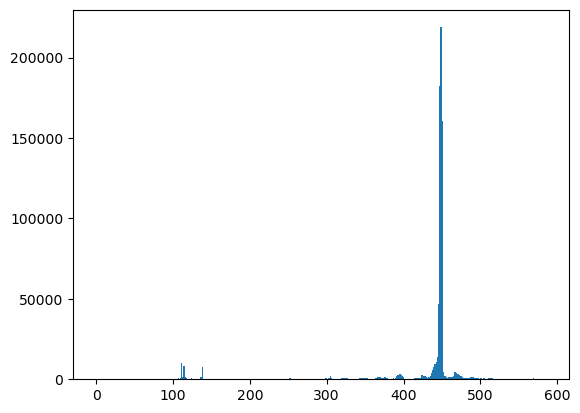

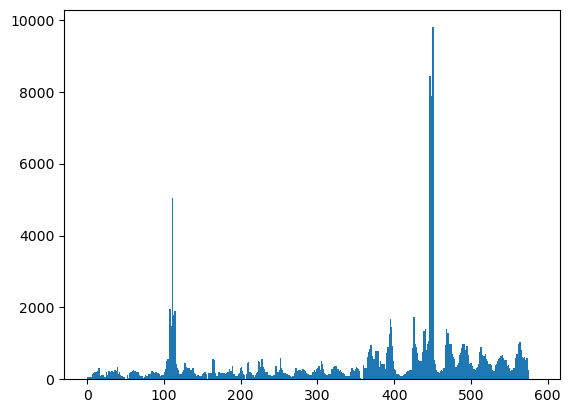

In [61]:
#9.2
plot_bar(times1)
plot_bar(times2)

In [ ]:
#Q10
#Library of Prediction Tasks given a tweet: 
# Predict the hashtags or how likely it is that a tweet belongs to a specific team fan. 
# Predict the number of retweets/likes/quotes. Predict the relative time at which a tweet was posted.

# Library of Prediction Tasks given a tweet:

## Predict how likely it is that a tweet belongs to a specific team fan. 

In [ ]:
# how to select features
json.loads(fs["#nfl"][6])

In [ ]:
from pandas.io.json import json_normalize 

In [ ]:
fs.keys()

In [ ]:
len(fs['#patriots'])

In [ ]:
json.loads(fs["#nfl"][6])

In [ ]:
nfl_data = fs["#nfl"]

In [ ]:
nfl_array=[]
for x in tqdm(nfl_data):
    s = (json.loads(x)['tweet']["text"])
    P =("#patriots" in s or "#gopatriots" in s)
    H = "#gohawks" in s or '#GoHawks' in s or "#Hawks" in s
    if P and H:
        continue
    if P:
        s=s.replace("#patriots", " ")
        s=s.replace("#gopatriots", " ")
        nfl_array.append([s,"patriots"])
    if H:
        s=s.replace("#gohawks", " ")
        s=s.replace("#GoHawks", " ")
        s=s.replace("#Hawks", " ")
        nfl_array.append([s,"hawks"])

In [ ]:
del fs
gc.collect()

In [ ]:
gc.collect()

In [ ]:
df = pd.DataFrame(nfl_array, columns=['text','team'])
df = df.drop(df[df.text==''].index)
df

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from tempfile import mkdtemp
from sklearn import svm
cachedir = mkdtemp()
pipe_the = Pipeline(steps=[
                       ('vect', CountVectorizer(stop_words='english')),
                       ('Tfid', TfidfTransformer()),
                       ('Reduction', TruncatedSVD(random_state=42)), 
                       ('classify', svm.SVC(kernel='linear',probability=True))], memory=cachedir)
pipe_Logistic = Pipeline(steps=[
                       ('vect', CountVectorizer(stop_words='english')),
                       ('Tfid', TfidfTransformer()),
                       ('Reduction', TruncatedSVD(random_state=42)), 
                       ('classify', LogisticRegression(penalty='l1',solver='liblinear',random_state=42,n_jobs=-1))], memory=cachedir)


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

opt_Logistic = BayesSearchCV(
     pipe_Logistic,
     {
         'Reduction__n_components': Integer(10, 300),
         'classify__C':  Real(1e-6, 1e+5, prior='log-uniform'),
     },
    scoring="accuracy",
     random_state=0,
    n_jobs = -1,
    cv=10
)

opt_Logistic.fit(df['text'],df['team'])

In [ ]:
opt_Logistic.best_params_

In [ ]:
pipe_best_Logistic = Pipeline(steps=[
                       ('vect', CountVectorizer(stop_words='english')),
                       ('Tfid', TfidfTransformer()),
                       ('Reduction', TruncatedSVD(random_state=42,n_components=300)), 
                       ('classify', LogisticRegression(penalty='l1',C=3.6905322020725797,solver='liblinear',random_state=42,n_jobs=-1))], memory=cachedir)

In [ ]:
pipe_best_SVM = Pipeline(steps=[
                       ('vect', CountVectorizer(stop_words='english')),
                       ('Tfid', TfidfTransformer()),
                       ('Reduction', TruncatedSVD(random_state=42,n_components=200)), 
                       ('classify', svm.SVC(kernel='linear',C=100,probability=True))], memory=cachedir)

In [ ]:
np.average(cross_val_score(pipe_best_SVM,df['text'],df['team'],cv=10,scoring='accuracy',n_jobs=-1))

In [ ]:
np.average(cross_val_score(pipe_best_Logistic,df['text'],df['team'],cv=10,scoring='accuracy',n_jobs=-1))

In [ ]:
dff = pd.DataFrame()
for x in tqdm(nfl_data):
    s = (json.loads(x)['tweet']["text"])
    P =("#patriots" in s or "#gopatriots" in s)
    H = "#gohawks" in s or '#GoHawks' in s or "#Hawks" in s
    if P and H:
        continue
    if P:
        temp = pd.DataFrame.from_dict(json.loads(x)["tweet"], orient='index').T
        temp["team"] = "patriots"
        dff = pd.concat([dff,temp])
    if H:
        temp = pd.DataFrame.from_dict(json.loads(x)["tweet"], orient='index').T
        temp["team"] = "hawks"
        dff = pd.concat([dff,temp])

In [ ]:
json.loads(nfl_data[0])["tweet"].keys()

In [ ]:
dff=dff.reset_index().drop(["index"], axis=1)

In [ ]:
dff_train = dff.drop(["team"], axis=1)

In [ ]:
dff

## Predict the number of retweets/likes/quotes. Predict the relative time at which a tweet was posted.

In [116]:
json.loads(fs['#nfl'][2])['tweet']['entities']

{'firstpost_date': 1420400988,
 'title': 'One more week until the #Seahawks begin the #NFL playoff rounds 💙💚 Go #Hawks! williamsonjs http://t.co/w8kEi4E5oR',
 'url': 'http://twitter.com/nelsenha/status/551827857262280704',
 'tweet': {'contributors': None,
  'truncated': False,
  'text': 'One more week until the #Seahawks begin the #NFL playoff rounds 💙💚 Go #Hawks! williamsonjs http://t.co/w8kEi4E5oR',
  'in_reply_to_status_id': None,
  'id': 551827857262280704,
  'favorite_count': 0,
  'source': '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
  'retweeted': False,
  'coordinates': None,
  'timestamp_ms': '1420400988294',
  'entities': {'symbols': [],
   'user_mentions': [],
   'trends': [],
   'hashtags': [{'indices': [24, 33], 'text': 'Seahawks'},
    {'indices': [44, 48], 'text': 'NFL'},
    {'indices': [70, 76], 'text': 'Hawks'}],
   'urls': [{'indices': [91, 113],
     'url': 'http://t.co/w8kEi4E5oR',
     'expanded_url': 'http://instagram.com/p/xccHoqsvY2/',
     'd

## Explore data

In [121]:
import re
entities=json.loads(fs['#nfl'][10])['tweet']['user']

In [122]:
entities

{'follow_request_sent': None,
 'profile_use_background_image': True,
 'geo_enabled': True,
 'description': 'SELFMADE BIZ WOMAN/COUNTRY/POP SINGER 1&ONLY #WEBCAM STAR #MODEL #BUSTY BOUNCY #BLONDE W/A BIG HEART WHO LUVS 2 PLAY WISHLIST: http://t.co/N27XYvkBUt',
 'verified': False,
 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/2570565181/qlkpznkisbtogqyo4ocm_normal.jpeg',
 'profile_sidebar_fill_color': 'FE4B73',
 'is_translator': False,
 'id': 17293159,
 'profile_text_color': '410936',
 'followers_count': 124848,
 'profile_sidebar_border_color': '000000',
 'id_str': '17293159',
 'default_profile_image': False,
 'location': 'TORONTO CANADA',
 'utc_offset': -18000,
 'statuses_count': 58021,
 'profile_background_color': '23B0BA',
 'friends_count': 2238,
 'profile_link_color': '410936',
 'profile_image_url': 'http://pbs.twimg.com/profile_images/2570565181/qlkpznkisbtogqyo4ocm_normal.jpeg',
 'notifications': None,
 'profile_background_image_url_https': 'https://pbs.twimg.co

In [ ]:
if match:
    tags=match.group(1)

In [36]:
hashtags_in_text=defaultdict(int)
for twt in fs['#nfl']:
    entities_tags=json.loads(twt)['tweet']['entities']['hashtags']
    for t in entities_tags:
        hashtags_in_text[t['text']]+=1
common_hashtags=sorted(hashtags_in_text.items(), key=lambda x:x[1], reverse=True)


In [109]:
top100tags_freq=common_hashtags[:100]

In [110]:
top100_tags_score=defaultdict(int)
for t,freq in top100tags_freq:
    top100_tags_score[t]=freq

## Feature Engineering

In [123]:
#features engineer
# user with more follower is more likely to get more retweet
followers_cnt=[]
#common hashtag more comment hashtag is more likely to be retwted
hash_tag_scores=[]
#more influential author is more likely to get retweet
influential_lvls_author=[]
#more influential the post is, the more likely it is to get retweeted
influential_lvls_post=[]
# target var
#using similarity
user_id=[]
twt_id=[]
retwts_cnts=[]
for twt in fs['#nfl']:
    json_obj=json.loads(twt)
    user_id.append(json_obj['tweet']['user']['id'])
    twt_id.append(json_obj['tweet']['id'])
    followers_cnt.append(json_obj['author']['followers'])
    if 'influence_level' in json_obj['author']:
        influential_lvls_author.append(json_obj['author']['influence_level'])
    else:
        influential_lvls_author.append(0)
    influential_lvls_post.append(json_obj['metrics']['citations']['influential'])
    retwts_cnts.append(json_obj['metrics']['citations']['total'])
    entities_tags=json_obj['tweet']['entities']['hashtags']
    score=0
    for t in entities_tags:
        tag=t['text']
        if tag in top100_tags_score:
            score+=top100_tags_score[tag]
    hash_tag_scores.append(score)


In [118]:
print(min(retwts_cnts),max(retwts_cnts))

1 3856


In [124]:
features={'user_id':user_id,
          'twt_id':twt_id,
          'followers':followers_cnt,
          'hashtag_score':hash_tag_scores,
          'influential_lvls_author':influential_lvls_author,
          'influential_lvls_post':influential_lvls_post,
          'retwts_cnts':retwts_cnts}
df=pd.DataFrame(features)

In [125]:
df

user_id              twt_id  followers  hashtag_score  \
0       2928895689  550144662250729472       41.0          82599   
1       2863139446  550872449974558720      361.0         212830   
2        246173151  551827857262280704        6.0         206082   
3       2931425955  552225977745833984     1364.0          41780   
4         35281083  552561374577299458      580.0         220969   
...            ...                 ...        ...            ...   
233017   165423536  564124624263585792     1589.0         188177   
233018    28270082  564127112316350464      391.0          37583   
233019  3010713845  564130766901477377      360.0         188177   
233020  1470324626  564135259777028096       69.0           9703   
233021  1470324626  564135403708776448       69.0           9703   

        influential_lvls_author  influential_lvls_post  retwts_cnts  
0                           7.0                      0            4  
1                           0.0                      0            2  
2                           4.0                      0            2  
3                           6.0                      0            2  
4                           1.0                      1           14  
...                         ...                    ...          ...  
233017                      0.0                      0            1  
233018                      0.0                      0            1  
233019                      0.0                      0            1  
233020                      0.0                      0            1  
233021                      0.0                      0            1  

[233022 rows x 7 columns]

## ML model

In [ ]:
#regression and mlp

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
cachedir = mkdtemp()
pipe = Pipeline(steps=[ 
                        ("scaler", scaler),
                       ("model", None)],memory=cachedir)
param_grid = {
    "model":[linear_model.Lasso(),Ridge()],
    "model__alpha":[0,0.2,0.4,0.6,0.8,1.0,1.5,2,5,10,100]
    
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1,scoring='neg_mean_squared_error', cv=10) 
search.fit(df.loc[:,['followers','hashtag_score','influential_lvls_author','influential_lvls_post']],retwts_cnts)


/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected

/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.503e+07, tolerance: 3.651e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are ad

GridSearchCV(cv=10,
             estimator=Pipeline(memory='/var/folders/n8/dyc9pqhx0y1bnvqnm7ntqxtw0000gn/T/tmp6jdak7bh',
                                steps=[('scaler', StandardScaler()),
                                       ('model', None)]),
             n_jobs=-1,
             param_grid={'model': [Lasso(), Ridge(alpha=100)],
                         'model__alpha': [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.5, 2, 5,
                                          10, 100]},
             scoring='neg_mean_squared_error')

In [186]:
search.best_score_

-134.5158534330962

In [185]:
search.cv_results_

{'mean_fit_time': array([2.97957287, 0.56782413, 0.56058786, 0.5545409 , 0.5740551 ,
        0.54008727, 0.54780288, 0.53792217, 0.54563119, 0.54281981,
        0.54025979, 0.53327038, 0.53677914, 0.53107119, 0.53581259,
        0.53422778, 0.5654814 , 0.54788206, 0.53692491, 0.5766089 ,
        0.57630064, 0.56042352]),
 'std_fit_time': array([0.26180287, 0.02625828, 0.01291338, 0.01663121, 0.02702676,
        0.01926408, 0.02637774, 0.00734985, 0.01607188, 0.01555512,
        0.0224669 , 0.00750485, 0.02268375, 0.01501619, 0.01896551,
        0.02359833, 0.04134829, 0.01663139, 0.01956577, 0.03125633,
        0.02023476, 0.03327649]),
 'mean_score_time': array([0.00547316, 0.00414648, 0.00324671, 0.00292459, 0.0036731 ,
        0.00357025, 0.00260017, 0.00280807, 0.00258527, 0.00254023,
        0.00258825, 0.00251935, 0.00283039, 0.00261362, 0.00320601,
        0.00259604, 0.00348732, 0.00247779, 0.00278332, 0.00278916,
        0.00299888, 0.00277519]),
 'std_score_time': array([3.28

In [187]:
pipe1 = Pipeline(steps=[ 
                        ("scaler", scaler),
                       ("model", LinearRegression())],memory=cachedir)
search1 = GridSearchCV(pipe1, param_grid={}, n_jobs=-1,scoring='neg_mean_squared_error', cv=10) 
search1.fit(df.loc[:,['followers','hashtag_score','influential_lvls_author','influential_lvls_post']],retwts_cnts)

GridSearchCV(cv=10,
             estimator=Pipeline(memory='/var/folders/n8/dyc9pqhx0y1bnvqnm7ntqxtw0000gn/T/tmp6jdak7bh',
                                steps=[('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             n_jobs=-1, param_grid={}, scoring='neg_mean_squared_error')

In [188]:
search1.best_score_

-134.5170710481433

In [190]:
pipe2=Pipeline(steps=[ 
                        ("scaler", scaler),
                       ("model", MLPRegressor(random_state=42, max_iter=500))],memory=cachedir)
param_grid={
    "model__hidden_layer_sizes":[(10,),(10,1),(20,10,1)],
    "model__alpha":[10,1,1e-3,1e-4,1e-5]
}
search2 = GridSearchCV(pipe2, param_grid, n_jobs=-1,scoring='neg_mean_squared_error', cv=10) 
search2.fit(df.loc[:,['followers','hashtag_score','influential_lvls_author','influential_lvls_post']],retwts_cnts)

/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/derek/opt/anaconda3/envs/ece219/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(memory='/var/folders/n8/dyc9pqhx0y1bnvqnm7ntqxtw0000gn/T/tmp6jdak7bh',
                                steps=[('scaler', StandardScaler()),
                                       ('model',
                                        MLPRegressor(max_iter=500,
                                                     random_state=42))]),
             n_jobs=-1,
             param_grid={'model__alpha': [10, 1, 0.001, 0.0001, 1e-05],
                         'model__hidden_layer_sizes': [(10,), (10, 1),
                                                       (20, 10, 1)]},
             scoring='neg_mean_squared_error')

In [191]:
search2.best_score_

-127.63968988015372

In [ ]:
#NMF with similarity

In [ ]:
from surprise import Dataset, Reader, accuracy
from surprise import NMF
from sklearn.model_selection import KFold
reader=Reader(rating_scale=(1,3856))
kdict=defaultdict(float)
kfold=KFold(10,shuffle=True,random_state=42)
for k in range(2,10,2):
    nmf=NMF(n_factors=k,random_state=42)
    MSE=0
    for train_idx,valid_idx in kfold.split(df.loc[:,['user_id','twt_id','retwts_cnts']]):
        train=Dataset.load_from_df(df.loc[train_idx,['user_id','twt_id','retwts_cnts']],reader)
        valid=df.loc[valid_idx,['user_id','twt_id','retwts_cnts']].to_numpy()
        nmf.fit(train.build_full_trainset())
        predictions=np.zeros_like(valid)
        for i in range(valid.shape[0]):
            user,twt=valid[i][0],valid[i][1]
            predictions[i]=[user,twt,nmf.predict(user,twt).est]
        error_rate=mean_squared_error(valid[:,2],predictions[:,2])
        MSE+=error_rate
    kdict[k]=MSE/10
    print(k,' average MSE:',kdict[k])

In [ ]:
#take advantage of similarity 
